**To run a simulation:** run function `md.simulation(nSims, experiment, mas)` It will return accuracy for specified span, across simulations. 

**To test the code:**  set `debug = True` and use `md.model_loop()`
*Note:* Rehearse is loaded in the interface code - simply comment out that line to try code without rehearsal. 

In [1]:
import MODS_interface as md ################## in debug state for major update
import actr
#import sklearn
import pandas as pd
import numpy as np
import random as rand
import matplotlib 

### initialize stims
stims = {3 : {'span_size': 3,
                  'corr_responses': ['4', '1', '7']}, 
         4 : {'span_size':4 ,
                  'corr_responses': ['3', '9', '2', '8']},    
         5 : {'span_size':5 ,
                  'corr_responses':['6', '4', '9', '1', '3']}, 
         6 : {'span_size': 6,
                  'corr_responses': ['8', '6', '4', '9','3', '5']}
        }

ACT-R connection has been started.
#|Warning: Non-ACT-R messages during load of "/Users/theodros/stag_2023/MODS_ACTR/andrea/Mods_a_la_Andy.lisp":
;Compiler warnings for "/Users/theodros/stag_2023/MODS_ACTR/andrea/Mods_a_la_Andy.lisp" :
;   In RETURN-WORD: Undeclared free variable Y

 |#


In [ ]:
actr.whynot("check-memory")

In [ ]:
md.current_response 

## Experiment

In [2]:
md.simulation(1, stims[6], 1.6)
#md.resps.dropna().mean(axis=1).plot(ylim=(0,1))

     0.000   GOAL                   SET-BUFFER-CHUNK GOAL ARTICULATE NIL
Presented item:  8 position:  1
#|Warning: Creating chunk VISUAL with no slots |#
#|Warning: Creating chunk ONE with no slots |#
     0.000   PROCEDURAL             CONFLICT-RESOLUTION
     0.180   PROCEDURAL             PRODUCTION-FIRED READ-ALOUD
#|Warning: String slot in a SUBVOCALIZE request must be a string. |#
     0.180   GOAL                   MOD-BUFFER-CHUNK GOAL
     0.180   PROCEDURAL             CLEAR-BUFFER VOCAL
     0.180   PROCEDURAL             CONFLICT-RESOLUTION
     0.360   PROCEDURAL             PRODUCTION-FIRED ENCODE-WM
NDIGITS 1
     0.360   GOAL                   MOD-BUFFER-CHUNK GOAL
     0.360   PROCEDURAL             CLEAR-BUFFER VISUAL
     0.360   PROCEDURAL             CLEAR-BUFFER IMAGINAL
     0.360   PROCEDURAL             CONFLICT-RESOLUTION
     0.560   IMAGINAL               SET-BUFFER-CHUNK-FROM-SPEC IMAGINAL
     0.560   PROCEDURAL             CONFLICT-RESOLUTION
     0.740 

,0
0,True
1,True
2,False
3,True
4,False
5,True


Computing activation for chunk IMAGINAL-CHUNK0-0
Computing base-level
Starting with blc: 0.0
Computing base-level from 7 references (17.643 10.659 7.871 6.300 4.520 3.060 0.740)
  creation time: 0.740 decay: 0.5  Optimized-learning: NIL
base-level value: 0.43537116
Total base-level: 0.43537116
Computing activation spreading from buffers
  Spreading 4.0 from buffer GOAL chunk GOAL-CHUNK0
    sources of activation are: (SIX NO NO YES)
    Spreading activation  0.0 from source SIX level  1.0 times Sji 0.0
    Spreading activation  0.0 from source NO level  1.0 times Sji 0.0
    Spreading activation  0.0 from source NO level  1.0 times Sji 0.0
    Spreading activation  0.0 from source YES level  1.0 times Sji 0.0
Total spreading activation: 0.0
Adding transient noise 0.0
Adding permanent noise 0.0
Chunk IMAGINAL-CHUNK0-0 has an activation of: 0.43537116
#|Warning: Calculated Sji value between WM and IMAGINAL-CHUNK0-0 is negative, but using a value of 0. |#
Computing activation for chunk IM

<AxesSubplot:>

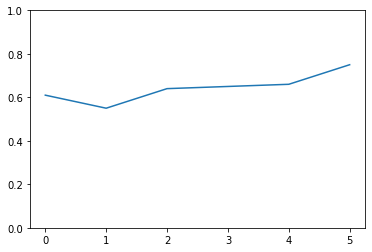

In [7]:
md.resps.dropna().mean(axis=1).plot(ylim=(0,1))


<AxesSubplot:>

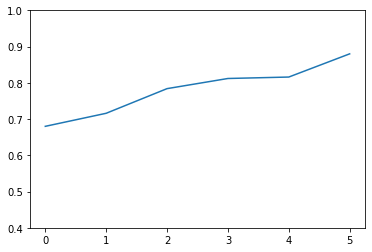

In [3]:
md.resps.dropna().mean(axis=1).plot(ylim=(0.4,1))


In [ ]:
actr.whynot('check-memory')
md.in_Position

In [ ]:
print(md.current_response)
print(md.stims[md.i])
print(md.corr_responses)
print(md.in_Position[md.i])
print(md.of_Type[md.i])
print(md.Pos_word[md.i])
print(md.i)
print(md.cr)


In [ ]:
md.resps.mean(axis=1).plot(ylim=(0.4,1), xlabel='serial position', ylabel='accuracy')
#md.resps

In [2]:
span_acc=pd.DataFrame({0:np.repeat('NaN',6)})
serial_acc = pd.DataFrame({0:np.repeat('NaN',6)})
p=0
for x in [6]:
    s=0
    print(x)
    for y in [1.5, 1.6,1.7,1.8]:
        md.simulation(100, stims[x], y)
        span_temp = md.resps.mean().mean()
        serial_temp = md.resps.transpose().mean()
        span_acc.loc[x,s]= span_temp
        serial_acc.loc[0:x-1, p] = serial_temp
        s+=1
        p+=1
#serial_acc.to_csv('serial_position_acc.csv')

6


In [3]:
serial_acc

,0,1,2,3
0,0.33,0.34,0.46,0.76
1,0.2,0.36,0.55,0.65
2,0.25,0.45,0.58,0.79
3,0.26,0.43,0.60,0.82
4,0.42,0.56,0.64,0.90
5,0.42,0.55,0.76,0.89


<AxesSubplot:xlabel='MAS', ylabel='accuracy'>

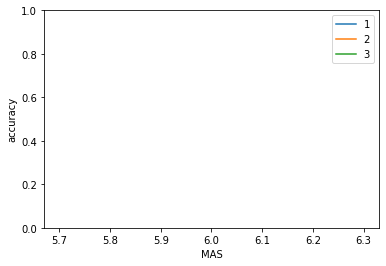

In [6]:
#for i in [6]:
   # span_acc.loc[i].plot( xlabel='MAS', ylabel='accuracy', legend=True, ylim=(0.4,1)) #IMAG 0
span_acc.plot( xlabel='MAS', ylabel='accuracy', legend=True, ylim=(0,1)) #IMAG 0


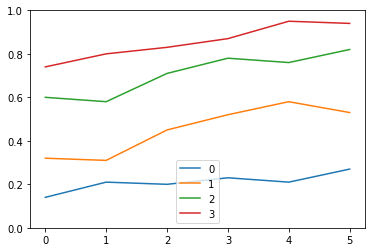

In [3]:
for i in range(4):
    #i+=30
    serial_acc.loc[0:5][i].plot(ylim=(0,1), legend=True)

In [53]:
serial_acc

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.95,0.98,1.00,0.95,0.99,1.0,0.99,1.0,1.0,...,0.64,0.67,0.69,0.58,0.66,0.83,0.93,0.99,1.0,1.0
1,0.98,0.99,0.99,0.97,0.96,1.00,1.0,1.00,1.0,1.0,...,0.74,0.69,0.74,0.81,0.76,0.93,0.97,0.98,1.0,1.0
2,0.99,0.99,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0,...,0.80,0.70,0.80,0.82,0.81,0.88,0.99,1.00,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.70,0.82,0.76,0.88,0.86,0.87,0.98,0.98,1.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,0.80,0.88,0.84,0.82,0.94,1.00,1.00,1.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,0.83,0.87,0.79,0.85,0.96,0.99,1.00,1.0,1.0


### Model fitting to behavioral data

In [4]:
sub_serial = pd.read_csv('../../mods_data/serial_pos_acc_stag2023.csv', header=None)
sub_span = pd.read_csv('../../mods_data/span_acc_stag2023.csv', header=None)

<AxesSubplot:>

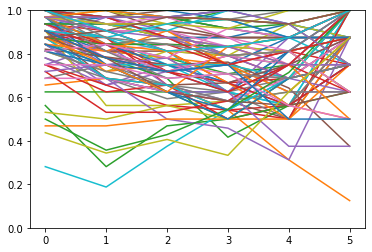

In [13]:
#span_acc=span_acc.dropna()
sub_serial.transpose().plot(legend=False, ylim=(0,1))

In [79]:
print(sub_span.loc[1, 0:3])
print(span_acc)

0    1.0
1    1.0
2    1.0
3    1.0
Name: 1, dtype: float64
          0         1         2         3         4         5         6  \
3  0.989899  0.976431  0.989899  0.989899  0.969697  0.996633  1.000000   
4  0.962121  0.962121  0.962121  0.954545  0.952020  0.987374  0.997475   
5  0.884848  0.844444  0.907071  0.913131  0.903030  0.943434  0.995960   
6  0.786667  0.751667  0.790000  0.786667  0.793333  0.901667  0.976667   

          7    8    9  
3  0.996633  1.0  1.0  
4  1.000000  1.0  1.0  
5  0.997980  1.0  1.0  
6  0.991667  1.0  1.0  


In [56]:
from sklearn import metrics


<AxesSubplot:>

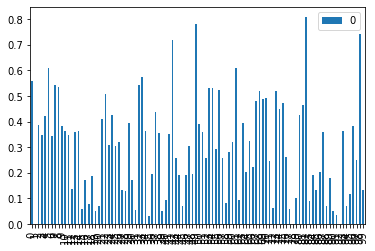

ACT-R connection error connection no longer available.


In [88]:
ths_rmse =[]
p_min =[]
for p in range(100):
    ths_rmse =[]
    for i in range(9):
        ths_rmse.append(metrics.mean_squared_error(span_acc.loc[3:6,i], sub_span.loc[p, 0:3], squared=False))
    p_min.append(np.array(ths_rmse).min())
    
#rmse=np.array(ths_rmse)
#hlp=rmse.reshape(100,9)
pd.DataFrame(p_min).plot(kind='bar')